In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
Keys = h5py.File('/home/hongyin.chen/Data/CCSN_key.h5', 'r')
Strains = h5py.File('/home/hongyin.chen/Data/Strain_Time.h5', 'r')
Aw = Keys['BHBL']['Name'][::].astype('U')
for i in range (len(Aw)):
    Aw[i] = Aw[i].replace('_BHBL', '')

EOSs = list(Keys)
Parameters = np.c_[Keys['BHBL']['A'][::].astype('f'), Keys['BHBL']['w'][::].astype('f')]

In [5]:
ST_hf = h5py.File('Strain_Time_2.h5', 'w')

start_time, end_time, sample_rate = -0.01, 0.0056, 1024 

i = 0 # index for Name 
for tupple in Aw: #different A and omega
    data = np.array([])
    j = 0 # index for EOSs
    for EOS in EOSs: #different EOSs
        if (j == 0 or j == 1 or j == 5 or j == 6 or j == 7 or j == 8 or j == 9 or j == 10 or j == 16 or j == 20) and i == 10 :
            pass
        elif (j == 13 or j == 14 or j == 15) and (i == 9 or i == 10 or i == 23 or i == 97):
            pass
        elif (j == 2 or j ==3) and (i == 7 or i == 8 or i == 9 or i == 10 or i == 22 or i == 23 or i == 60 or i == 61 or i == 95 or i == 96 or i == 97):
            pass
        elif (j == 4) and (i == 7 or i == 8 or i == 9 or i == 10 or i == 21 or i == 22 or i == 23 or i == 38 or i == 58 or i == 59 or i == 60 or i == 61 or i == 94 or i == 95 or i == 96 or i == 97):
            pass
        elif (j == 17 or j ==18 or j ==19) and (i < 78):
            pass
        else:
            function = interpolate.interp1d(Strains[EOS][tupple+'_'+EOS]['Time'][:], Strains[EOS][tupple+'_'+EOS]['Strain'][:])
            Timer = np.linspace(start_time, end_time, sample_rate) 
            data = np.append(data, function(Timer))
        j += 1
    data = data.reshape([-1,sample_rate])
    g1 = ST_hf.create_group(tupple)
    g1.create_dataset('Strain', data = data)
    g1.create_dataset('Parameters', data = Parameters[i])
    i += 1
ST_hf.close()

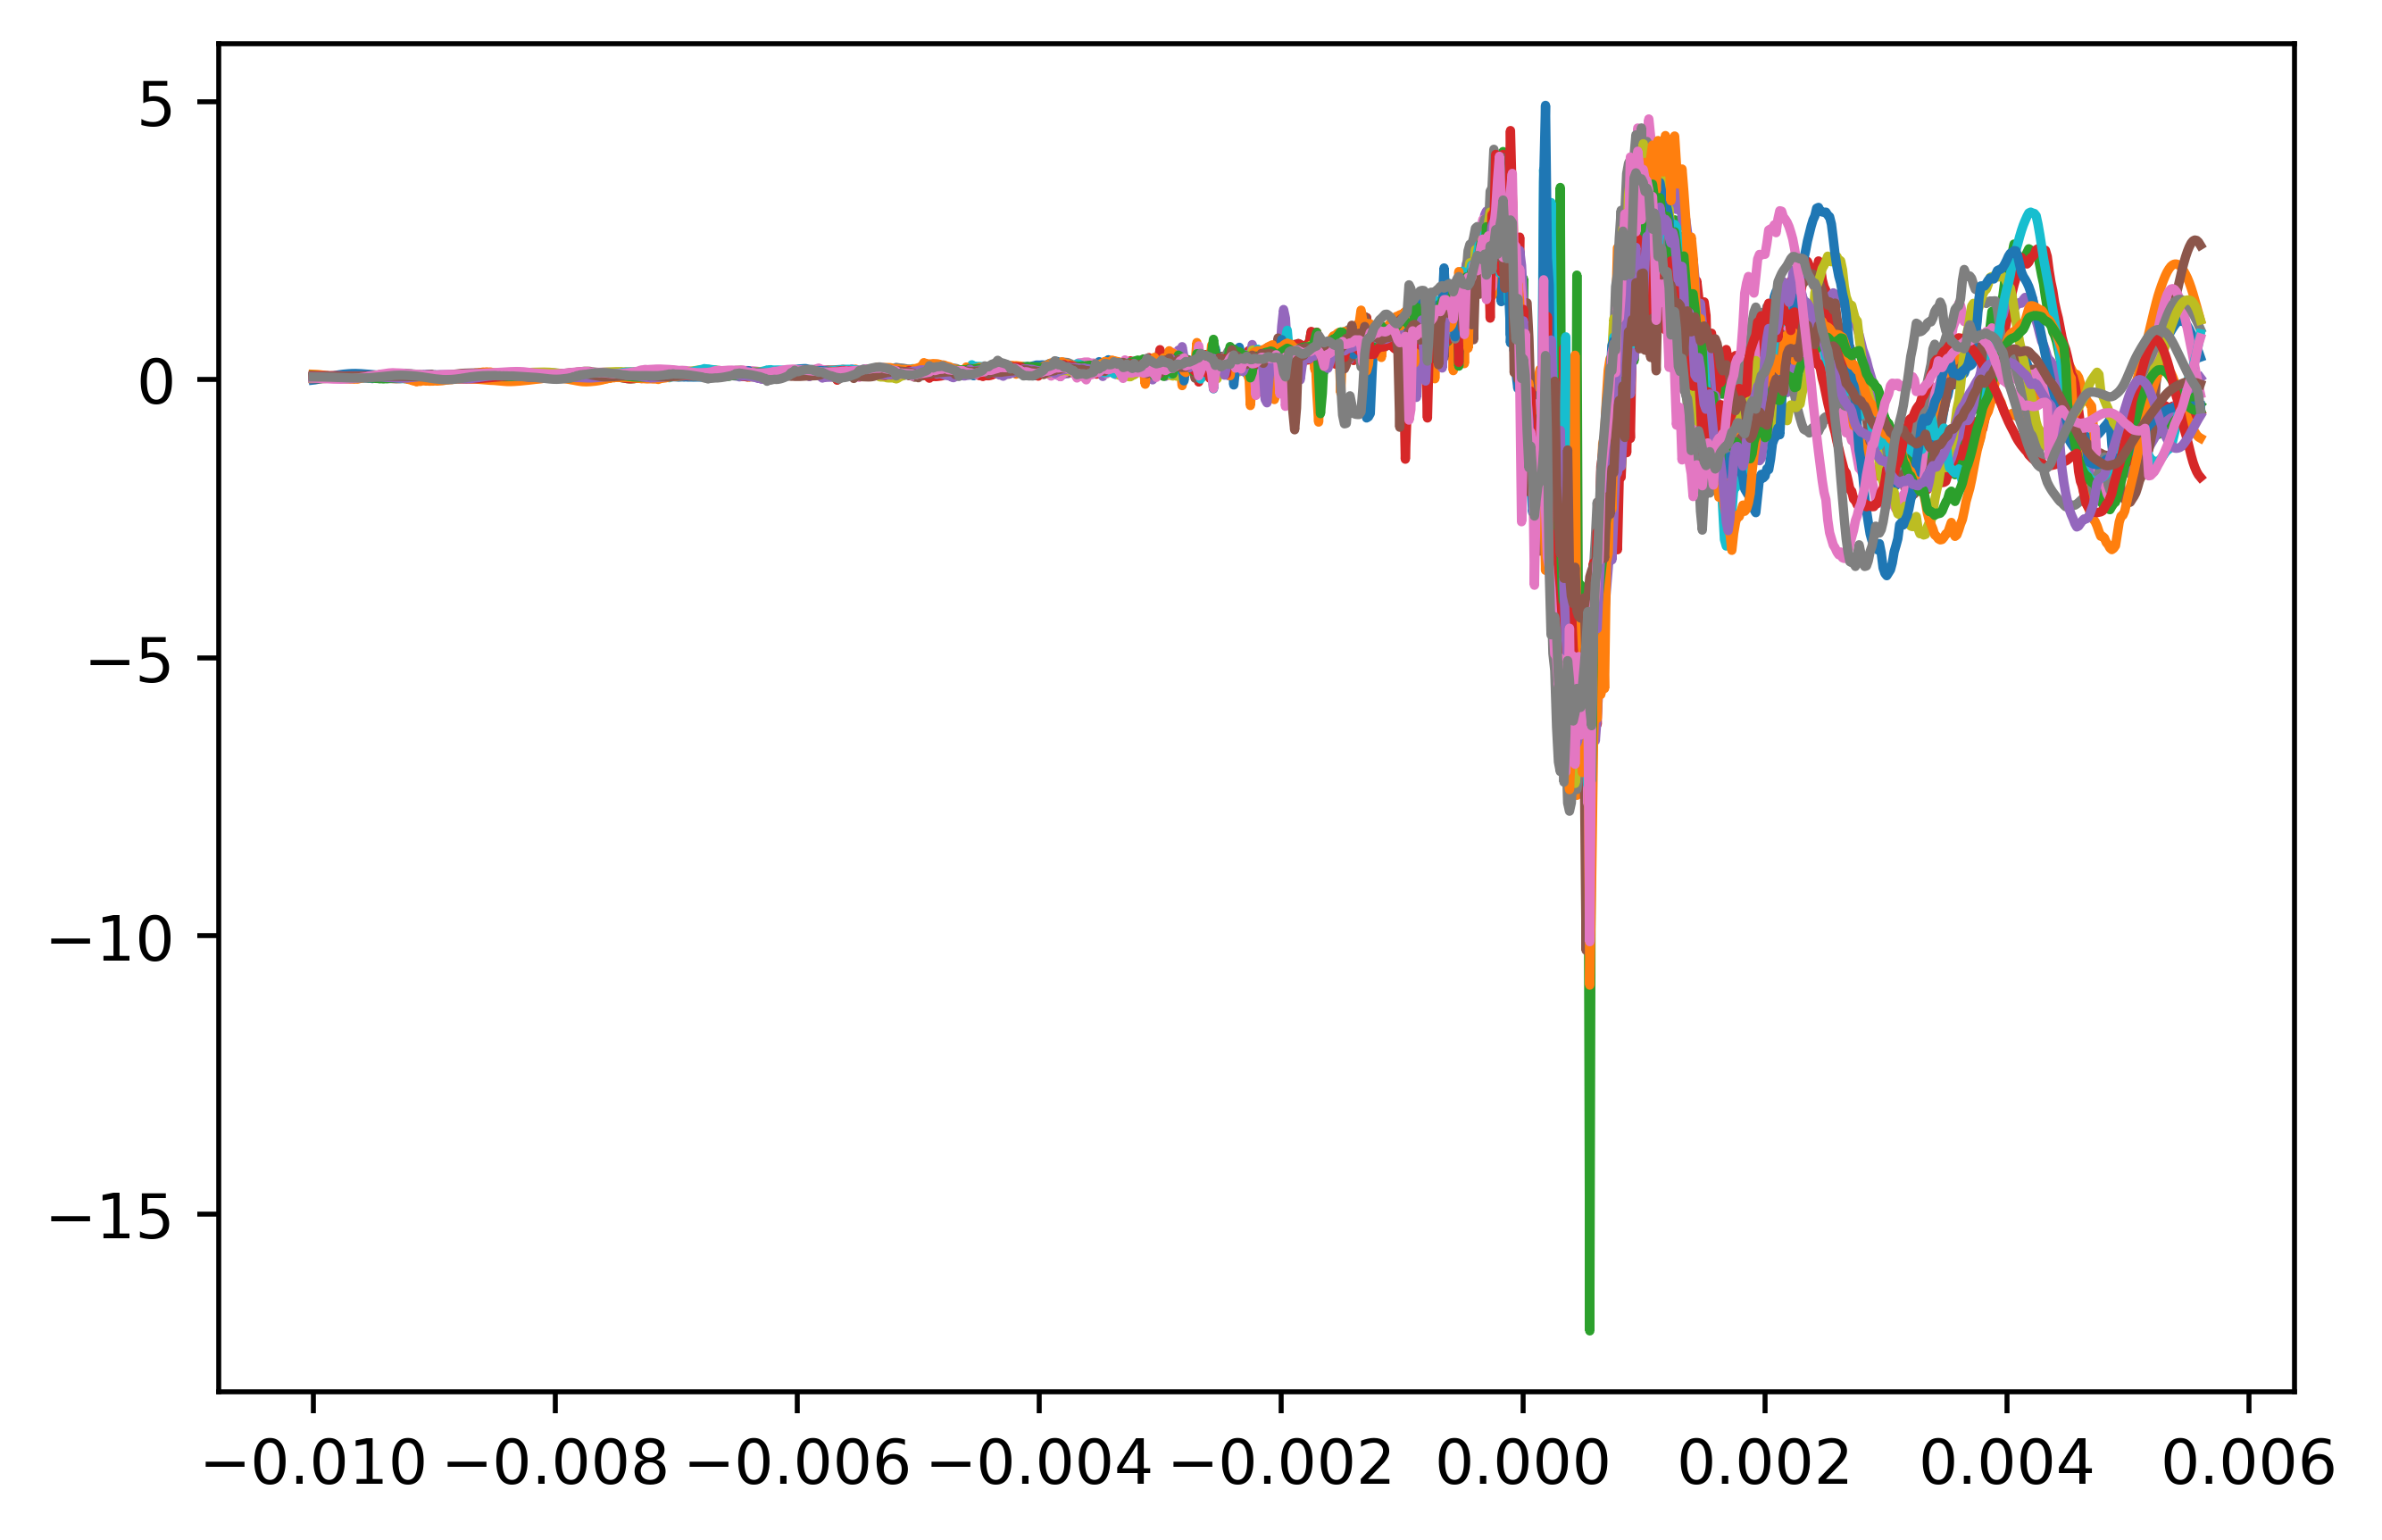

In [12]:
New_Strain_Time = h5py.File('Strain_Time_2.h5', 'r')
plt.figure(dpi = 500)
for i in range(len(New_Strain_Time['A1268w0.50']['Strain'][:])):
    plt.plot(Timer, New_Strain_Time['A1268w0.50']['Strain'][i])
plt.show()
New_Strain_Time.close()
print('')